<a href="https://colab.research.google.com/github/AldoVidales/Iapersonal/blob/main/practica4concret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aldo Vidales 

Pronosticar fuerza del concreto

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib

Using matplotlib backend: agg


In [2]:
datos=pd.read_csv("/content/drive/MyDrive/clase4/Concrete.csv")
datos.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
datos2=datos[['cement','slag','flyash','water','superplasticizer','coarseaggregate','fineaggregate','age']]

In [139]:
from sklearn.decomposition import PCA
reduccion= PCA(n_components=1)
reduccion.fit(datos2)
datos_red=pd.DataFrame(reduccion.transform(datos2),columns=['t1'])
datos_red.head()

,t1
0,284.793631
1,284.657245
2,101.843848
3,111.188675
4,-57.181489


In [140]:
import statsmodels.api as sm
y = datos["csMPa"]
x = datos2[['cement','slag','flyash','water','superplasticizer','coarseaggregate','fineaggregate','age']]
x = sm.add_constant(x) # para contar con la b en nuestra f()
m = sm.OLS(y, x).fit() 
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  csMPa   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     204.3
Date:                Sat, 24 Apr 2021   Prob (F-statistic):          6.29e-206
Time:                        15:29:20   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -23.3312     26.586  

In [7]:
datos_red.head()

,t1,t2
0,284.793631,-10.352341
1,284.657245,-14.470825
2,101.843848,183.443938
3,111.188675,190.080800
4,-57.181489,57.591349


In [204]:

datos['t1']=datos_red['t1']


In [194]:
from sklearn.model_selection import  train_test_split as split
from sklearn.linear_model import LinearRegression as LR
y = datos["csMPa"]
x = datos2[['cement','slag','flyash','water','superplasticizer','coarseaggregate','fineaggregate','age']]
x_train,x_test,y_train,y_test=split(x,y,test_size=0.45)

reg=LR()

reg.fit(x_train,y_train)

print(reg.score(x_test,y_test))
datos['pronostico']=reg.predict(x)
datos.head()

0.6057737190610721


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa,pronostico
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,54.724304
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,54.951478
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,56.592597
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,68.060841
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,63.499347


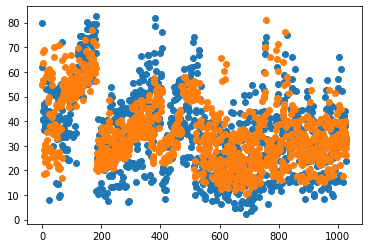

In [200]:
fig,ax=plt.subplots()
ax.plot(datos['csMPa'],marker='o',linestyle='')
ax.plot(datos['pronostico'],marker='o',linestyle='')
plt.show()

In [225]:
datos=datos.sort_values(by='t1')

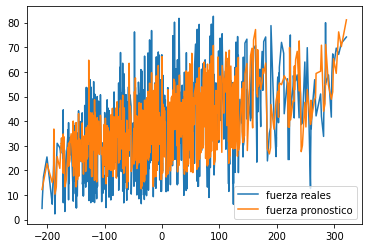

In [226]:

plt.plot(datos['t1'],datos['csMPa'] , label='fuerza reales')
plt.plot(datos['t1'],datos['pronostico'], label='fuerza pronostico')

plt.legend()
plt.show()